In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set color map to have light blue background
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Fitting non-linear predictors

Let's look at two examples using non-linear predictors.  The first uses a polynomial regression model as shown in the text and we use two interfaces to produce it. The second is not in the ISLR text but shows you how to use arbitrary `numpy` functions in your regression formula.

This data set uses information concerning auto mileage *vs* various attributes of the engine (displacement, etc). Let's read in the data from the [UCI machine learning data repository](https://archive.ics.uci.edu/ml/datasets/auto+mpg).

In [2]:
autompg = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data',
                      header=None,
                      names=['mpg', 'cyl', 'disp', 'hp', 'wt', 'accel', 'yr', 'origin', 'nm'],
                      delim_whitespace=True)

We need to transform the horsepower column because it contains some question marks that we'll force to be interpreted as NaN's. We'll then drop the rows contain those entries from the table.

In [3]:
autompg.hp = pd.to_numeric(autompg.hp, errors='coerce')
autompg = autompg.dropna(axis=0)

Now, let's look at scatter plots of the MPG and HP or WT columns. Note that the trend has a curve to -- it could be linear, but it doesn't look like it is.

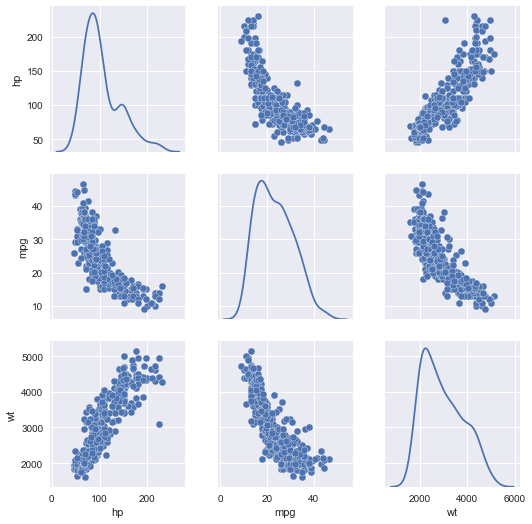

In [4]:
sns.pairplot(autompg[['hp', 'mpg','wt']], diag_kind='kde');

Let's try fitting a linear model to predict MPG~HP.  The resulting model has a relatively low $R^2$ although it's still acceptable.

In [5]:
auto_est = smf.ols('mpg ~ hp', autompg).fit()
auto_est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 22 Mar 2018   Prob (F-statistic):           7.03e-81
Time:                        09:58:40   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
hp            -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Let's plot some diagnostic plots. First, let's plot the data against the model

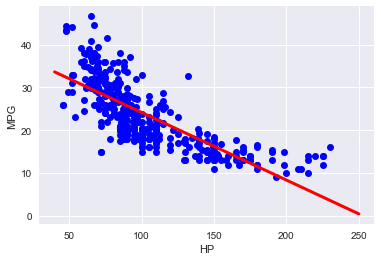

In [6]:
plt.plot(autompg.hp, autompg.mpg, 'bo');
xticks = np.linspace(40,250)
plt.plot(xticks, auto_est.params[0] + xticks * auto_est.params[1], 'r', lw=3);
plt.xlabel('HP');
plt.ylabel('MPG');

And, as if that wasn't bad enough, if we look at the fitted values and residual plot, we see that there's a clear trend in the residuals, indicating a bad fit.

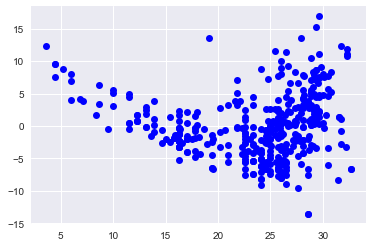

In [7]:
plt.plot(auto_est.fittedvalues, auto_est.resid, 'bo');

Let's fit a quadractic model, $$MPG \sim \beta_0 + \beta_1 * HP + \beta_2 * HP^2 $$

In [8]:
auto_est2 = smf.ols('mpg ~ hp + np.power(hp,2)', autompg).fit()
auto_est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Thu, 22 Mar 2018   Prob (F-statistic):           5.40e-99
Time:                        09:58:40   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          56.9001      1.800     31.604      0.000      53.360      60.440
hp                 -0.4662      0.031    -14.978      0.000      -0.527      -0.405
np.power(hp, 2)     0.0012      0.000     10.080      0.000       0.001       0.001
==============================================================================
Omnibus:                       16.158   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.662
Skew:                           0.218   Prob(JB):                     2.20e-07
Kurtosis:                       4.299   Cond. No.                     1.29e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

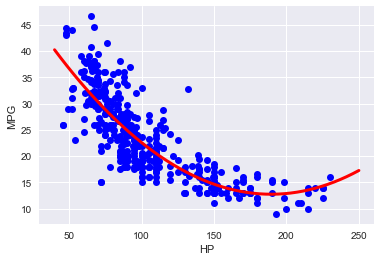

In [25]:
plt.plot(autompg.hp, autompg.mpg, 'bo');
xticks = np.linspace(40,250)
plt.plot(xticks, auto_est2.params[0] + xticks * auto_est2.params[1] + (xticks**2) * auto_est2.params[2], 'r', lw=3);
plt.xlabel('HP');
plt.ylabel('MPG');

We can also plot the measured values vs. the predicted values for the MPG. If our model predicts things perfect, this should be a horizontial line along the actual MPG values.

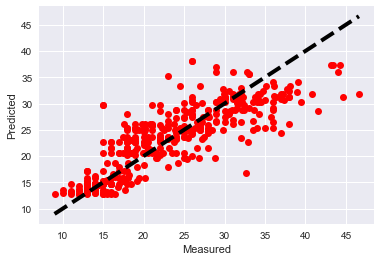

In [24]:
auto_y = autompg.mpg
plt.plot(autompg.mpg, auto_est2.predict(autompg), 'ro');
plt.plot([auto_y.min(), auto_y.max()], [auto_y.min(), auto_y.max()], 'k--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted');

There are several other interfaces to get the same polynomial design. For example, we can use the following from the library `sklearn` -- it has the advantage of being able to quickly change the polynomial degree without editing a long formula.

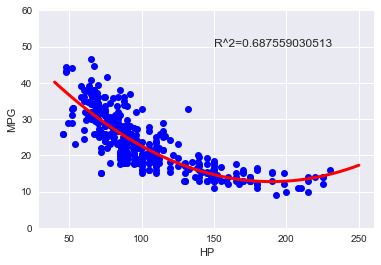

In [10]:
from sklearn.preprocessing import PolynomialFeatures
X = PolynomialFeatures(2).fit_transform(autompg.hp.values.reshape(-1,1))
ss = sm.OLS(autompg.mpg, X).fit()
plt.plot(autompg.hp, autompg.mpg, 'bo');
xticks = np.linspace(40,250)
plt.plot(xticks, np.polynomial.polynomial.polyval(xticks,ss.params), 'r', lw=3)
plt.text(150,50, 'R^2=' + str(ss.rsquared))
plt.ylim(0,60)
plt.xlabel('HP');
plt.ylabel('MPG');

Let's using a log-log transformation, which involves transforming the outcome as well as predictor.

In [11]:
auto_lgest = smf.ols('np.log(mpg) ~ np.log(hp)', autompg).fit()
auto_lgest.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(mpg)   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     1016.
Date:                Thu, 22 Mar 2018   Prob (F-statistic):          1.13e-110
Time:                        09:58:40   Log-Likelihood:                 118.52
No. Observations:                 392   AIC:                            -233.0
Df Residuals:                     390   BIC:                            -225.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.9606      0.121     57.296      0.000       6.722       7.199
np.log(hp)    -0.8418      0.026    -31.881      0.000      -0.894      -0.790
==============================================================================
Omnibus:                        6.244   Durbin-Watson:                   1.094
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                8.144
Skew:                          -0.122   Prob(JB):                       0.0170
Kurtosis:                       3.663   Cond. No.                         64.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can plot the fit in the transformed space - i.e. in the log-log space of the data.

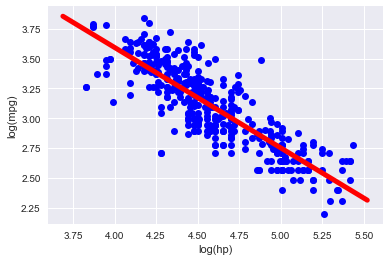

In [17]:
plt.plot(np.log(autompg.hp), np.log(autompg.mpg), 'bo');
xticks = np.linspace(40, 250)
plt.plot(np.log(xticks), auto_lgest.params[0] + np.log(xticks) * auto_lgest.params[1], 'r', lw=5);
plt.xlabel('log(hp)')
plt.ylabel('log(mpg)');

We will also plot the predicted *vs* the measured value, indicating the error.
The "true" values should fall allong the dotted line.

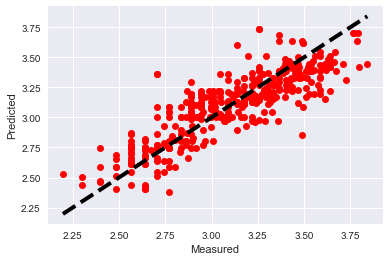

In [26]:
auto_y = np.log(autompg.mpg)
plt.plot(np.log(autompg.mpg), auto_lgest.predict(autompg), 'ro');
plt.plot([auto_y.min(), auto_y.max()], [auto_y.min(), auto_y.max()], 'k--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted');

If we transform the data back into the original units, we need be more careful.

Since $ log(hp) = \beta_0 + \beta_1 log(mpg) $, taking the anti-log (exponent) gives us

$$ hp = \exp( \beta_0 + \beta_1 \log(mpg) ) = \exp(\beta_0) * \exp(\beta_1 \log(mpg) ) $$

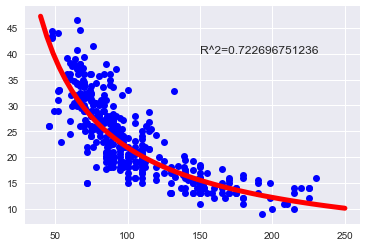

In [14]:
plt.plot(autompg.hp, autompg.mpg, 'bo');
xticks = np.linspace(40, 250)
plt.plot(xticks,  np.exp(auto_lgest.params[0] + np.log(xticks) * auto_lgest.params[1]), 'r', lw=5);
plt.text(150,40, 'R^2=' + str(auto_lgest.rsquared));

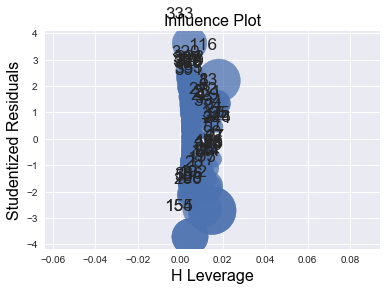

In [15]:
sm.graphics.influence_plot(auto_lgest);

What's that outlier?

In [16]:
autompg.iloc[[154,330]]

mpg  cyl   disp     hp      wt  accel  yr  origin                nm
156  16.0    8  400.0  170.0  4668.0   11.5  75       1  pontiac catalina
333  32.7    6  168.0  132.0  2910.0   11.4  80       3     datsun 280-zx